In [1]:
import pandas as pd
import numpy as np

c:\Users\Alfre\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alfre\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alfre\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Carga los datos

In [2]:
df = pd.read_csv(r"../Limpieza_de_datos/train.csv")
kaggle_test = pd.read_csv(r"../Limpieza_de_datos/test.csv")

## Preparación y transofrmación de los datos

In [3]:
df['FamSize'] = df['SibSp'] + df['Parch'] + 1

#we create features based on the family size
df['Single'] = df['FamSize'].map(lambda s: 1 if s == 1 else 0)
df['SmallF'] = df['FamSize'].map(lambda s: 1 if  2 <= s <= 4  else 0)
df['LarF'] = df['FamSize'].map(lambda s: 1 if 5 <= s else 0)

In [4]:
df.Embarked.fillna('S', inplace=True)

df_dummies = pd.get_dummies(df.Embarked, prefix='Embarked')
df = pd.concat([df, df_dummies], axis=1)

df.drop('Embarked', axis=1, inplace=True)

In [5]:
df.Cabin.fillna('U', inplace=True)

df['Cabin'] = df['Cabin'].map(lambda c: c[0])

#dummy
cabin_dummies = pd.get_dummies(df['Cabin'], prefix='Cabin')
df = pd.concat([df, cabin_dummies], axis=1)

df.drop('Cabin', axis=1, inplace=True)

In [6]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

Aquí el código se utiliza para procesar datos de un DataFrame 'df', extrayendo títulos de nombres, asignándoles categorías específicas y creando un nuevo DataFrame 'dfwoname' sin las columnas 'Name' y 'Ticket'.

In [7]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major":"Major",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle":"Miss",
    "Ms":"Mrs",
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Lady":"Royalty"
}

df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

df['Title'] = df.Title.map(Title_Dictionary)

dfwoname = df.drop(['Name', 'Ticket'], axis=1)


In [8]:
dfwoname.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,Single,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,0,3,male,22.0,1,0,7.2500,2,0,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,female,38.0,1,0,71.2833,2,0,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,1,3,female,26.0,0,0,7.9250,1,1,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,female,35.0,1,0,53.1000,2,0,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,0,3,male,35.0,0,0,8.0500,1,1,...,0,0,0,0,0,0,0,0,1,Mr


En resumen, este código se utiliza para completar los valores faltantes en la columna 'Age' del DataFrame 'df' utilizando medianas basadas en las categorías de 'Sex', 'Pclass' y 'Title'. También, se realiza una búsqueda alternativa si no se encuentra una coincidencia específica de 'Title'.

In [9]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()

In [10]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [11]:
def fill_age(row):    
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        (grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    if np.isnan(grouped_median_train[condition]['Age'].values[0]):
        print('true')
        condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        #(grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global df
    df['Age'] = df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return df

In [12]:
df = process_age()

In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,0,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,1,0,0,0,0,0,0,Mr


In [77]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

En términos de desbalance, podemos observar que hay una diferencia entre las dos clases. La clase con "549" instancias es más grande en comparación con la clase con "342" instancias. Este desbalance podría tener implicaciones en el rendimiento de modelos de aprendizaje automático, ya que los modelos pueden tender a ser sesgados hacia la clase mayoritaria.

Es importante tener en cuenta el desbalance al entrenar un modelo y considerar técnicas de manejo de desbalance, como el sobremuestreo de la clase minoritaria o el submuestreo de la clase mayoritaria, para que el modelo pueda aprender de manera equilibrada y tomar decisiones más precisas para ambas clases. Sin embargo, al momento de crear el modelo para el random forest se observó que el modelo no mejoraba al aplicar estas técnicas, al contrario hacía que el modelo tendiera aol overfitting (random_forest.ipynb) por lo que se decidió no aplicarlas.

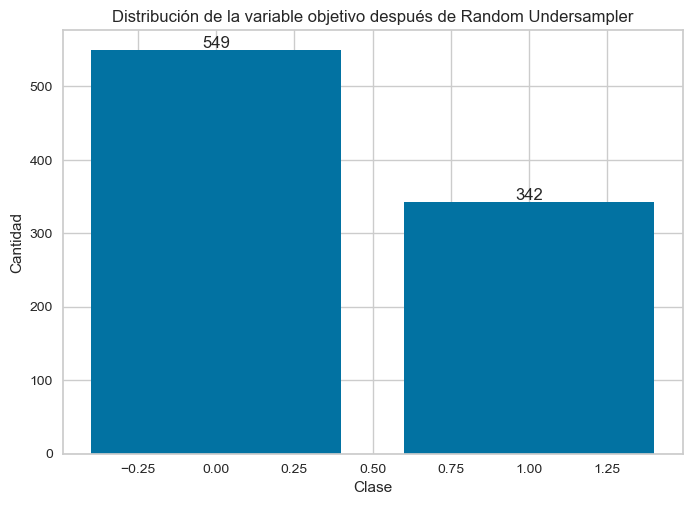

In [78]:
import matplotlib.pyplot as plt

# Datos de la distribución después de aplicar Random Undersampler
clases = [0, 1]
cantidad = [549, 342]

# Crear gráfico de barras
plt.bar(clases, cantidad)

# Agregar etiquetas de conteo en las barras
for i in range(len(clases)):
    plt.text(clases[i], cantidad[i], str(cantidad[i]), ha='center', va='bottom')

# Etiquetas y título del gráfico
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de la variable objetivo después de Random Undersampler')

# Mostrar el gráfico
plt.show()

### Transformación de los datos

Aquí este código se encarga de preparar y preprocesar los datos en el DataFrame 'df' para su posterior análisis, incluyendo la codificación de variables categóricas y la eliminación de columnas no deseadas.

In [13]:
df_encoded = df.drop(['Name'], axis=1)

df_encoded = pd.get_dummies(df_encoded, columns=["Title"], prefix=["Title"])

df_encoded = df_encoded.drop(['Title_Royalty'], axis=1)


from sklearn.preprocessing import LabelEncoder
# Use LabelEncoder for "categorical_col"
label_encoder = LabelEncoder()
df_encoded["Ticket"] = label_encoder.fit_transform(df_encoded["Ticket"])
df_encoded["Sex"] = label_encoder.fit_transform(df_encoded["Sex"])

print(df_encoded.columns.tolist())



['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamSize', 'Single', 'SmallF', 'LarF', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer']


Separamos los datos en conjunto de train y de test para evaluar nuestros modelos.

In [15]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Survived', axis = 1), df_encoded['Survived'], test_size=0.1, random_state=100)

## Modelo XGB default sin tunear

Aquí creamos un modelo de clasificación utilizando el algoritmo XGBoost (Extreme Gradient Boosting) sin ajustar hiperparámetros. Aquí está una explicación rápida:

1. Se importa el modelo XGBoost como 'xgb' (presumiblemente ya se ha importado previamente).

2. Se crea una instancia de un modelo XGBoost llamado 'xgb_model' con ciertos hiperparámetros predefinidos:
   - `n_estimators`: El número de rondas de impulso o árboles que se utilizarán en el modelo.
   - `max_depth`: La profundidad máxima de cada árbol en el modelo.
   - `learning_rate`: La tasa de aprendizaje, que controla la magnitud de las actualizaciones en cada paso del impulso.

3. Se establece un valor de semilla aleatorio para asegurar la reproducibilidad del modelo.

4. Se ajusta el modelo utilizando los datos de entrenamiento ('X_train' y 'y_train') mediante el método `fit`. Esto implica que el modelo XGBoost aprenderá a partir de los datos y construirá un conjunto de árboles de decisión que se utilizarán para hacer predicciones.

Este código crea un modelo XGBoost básico con los hiperparámetros básicos y lo entrena con los datos de entrenamiento. Para obtener un rendimiento óptimo del modelo, es posible que desees ajustar los hiperparámetros y evaluar su rendimiento en datos de prueba antes de usarlo en aplicaciones prácticas.

In [16]:
import xgboost as xgb

In [17]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,       # Maximum depth of each tree
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [18]:
y_pred = xgb_model.predict(X_test)
print(X_test.head(10))

     PassengerId  Pclass  Sex   Age  SibSp  Parch  Ticket      Fare  FamSize  \
205          206       3    0   2.0      0      1     316   10.4625        2   
44            45       3    0  19.0      0      0     282    7.8792        1   
821          822       3    1  27.0      0      0     269    8.6625        1   
458          459       2    0  50.0      0      0     572   10.5000        1   
795          796       2    1  39.0      0      0     223   13.0000        1   
118          119       1    1  24.0      0      1     585  247.5208        2   
424          425       3    1  18.0      1      1     458   20.2125        3   
678          679       3    0  43.0      1      6     566   46.9000        8   
269          270       1    0  35.0      0      0     613  135.6333        1   
229          230       3    0  18.0      3      1     488   25.4667        5   

     Single  ...  Cabin_F  Cabin_G  Cabin_T  Cabin_U  Title_Major  \
205       0  ...        0        1        0       

### Evaluacion del modelo

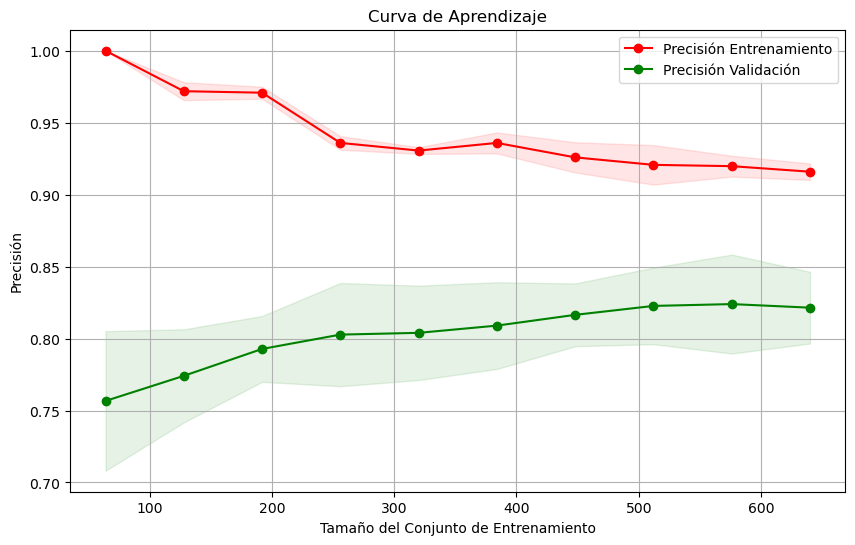

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcula las medias y las desviaciones estándar de los puntajes para el conjunto de entrenamiento y el conjunto de validación
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Precisión Entrenamiento"
)
plt.plot(
    train_sizes, val_scores_mean, "o-", color="g", label="Precisión Validación"
)

plt.legend(loc="best")
plt.show()


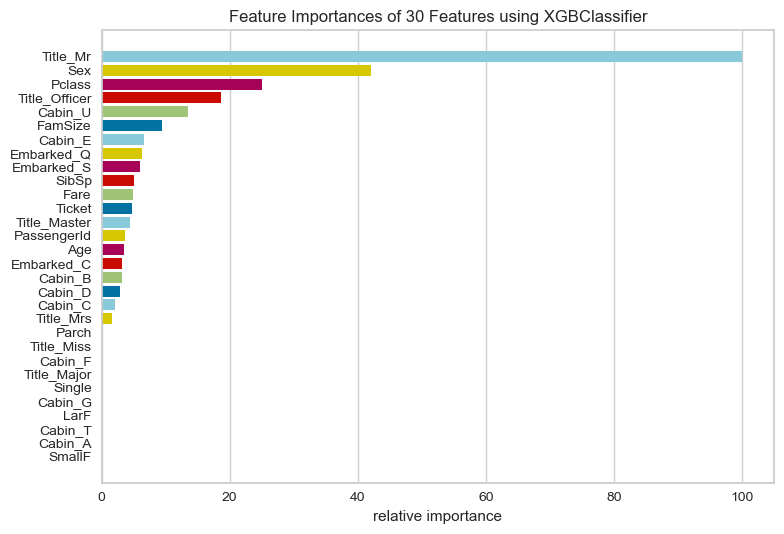

<AxesSubplot:title={'center':'Feature Importances of 30 Features using XGBClassifier'}, xlabel='relative importance'>

In [20]:
import yellowbrick
from yellowbrick.model_selection import FeatureImportances
feature_names = X_train.columns

viz = FeatureImportances(xgb_model, labels=feature_names)

viz.fit(X_train, y_train)

viz.show(feature=20)

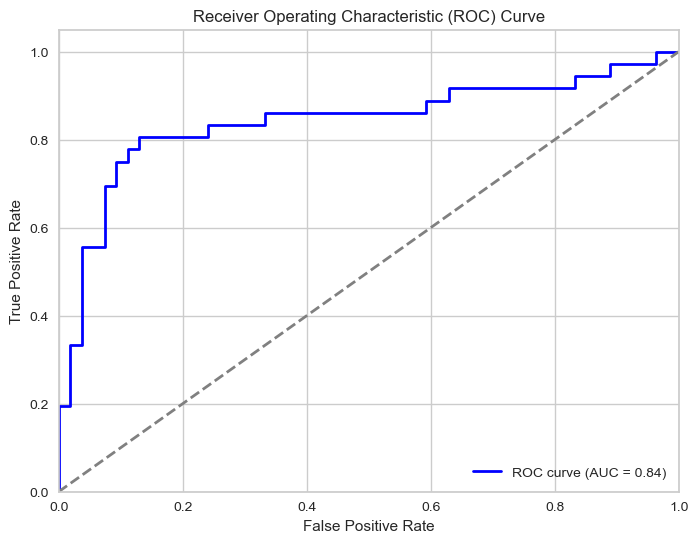

In [21]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

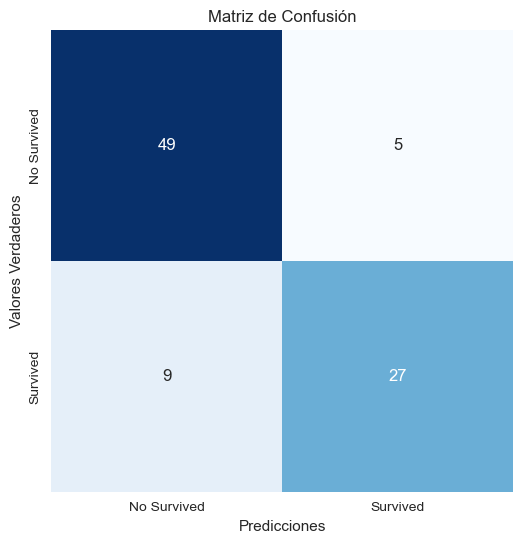

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No Survived', 'Survived'], yticklabels=['No Survived', 'Survived'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


In [23]:
from sklearn.metrics import classification_report

# Make predictions
#y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        54
           1       0.84      0.75      0.79        36

    accuracy                           0.84        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.84      0.84        90



In [24]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8444444444444444


#### Los feature importances ordenados de mayor a menor del XGB

          Feature  Importance
27       Title_Mr    0.374847
2             Sex    0.157958
1          Pclass    0.093744
29  Title_Officer    0.069726
23        Cabin_U    0.050769
8         FamSize    0.035101
19        Cabin_E    0.025078
13     Embarked_Q    0.023541
14     Embarked_S    0.022699
4           SibSp    0.018815
7            Fare    0.018537
6          Ticket    0.017587
25   Title_Master    0.016764
0     PassengerId    0.013498
3             Age    0.013104
12     Embarked_C    0.011876
16        Cabin_B    0.011656
18        Cabin_D    0.010809
17        Cabin_C    0.007891
28      Title_Mrs    0.005889
5           Parch    0.000110
11           LarF    0.000000
10         SmallF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
9          Single    0.000000
24    Title_Major    0.000000
26     Title_Miss    0.000000
15        Cabin_A    0.000000


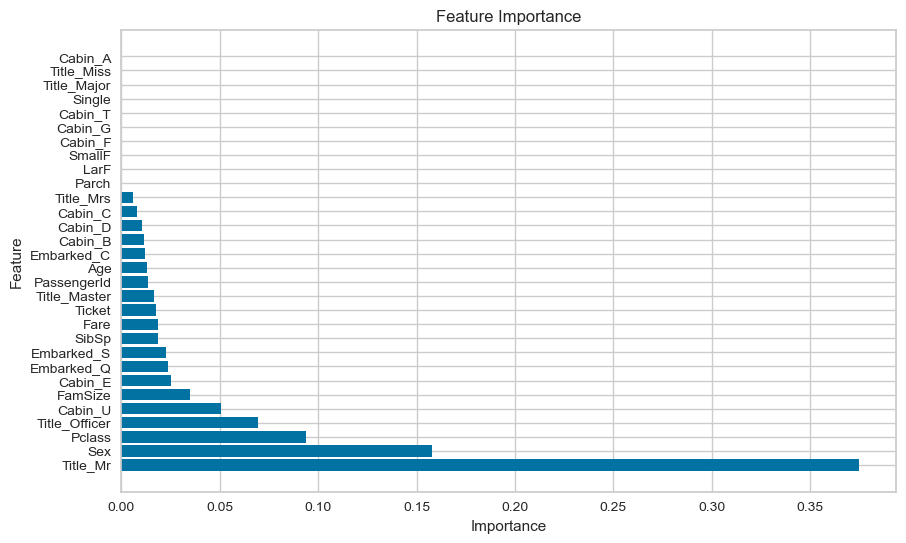

In [25]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

#### Los feature importances ordenados de mayor a menor del random forest

Ahora vamos a aprovechar que también aprendimos a aplicar el modelo de clasificación Random Forest (random_forest.ipynb) y vamos a evaluarlo con los mismos datos de test que usamos para evaluar el modelo de XGB y calcular el feature importances para poder complementar nuestro análisis.

In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

          Feature  Importance
27       Title_Mr    0.252804
2             Sex    0.221853
1          Pclass    0.079392
28      Title_Mrs    0.064404
26     Title_Miss    0.061482
23        Cabin_U    0.060546
7            Fare    0.057743
6          Ticket    0.045015
8         FamSize    0.029012
3             Age    0.025563
10         SmallF    0.020952
4           SibSp    0.013420
16        Cabin_B    0.010566
11           LarF    0.009955
0     PassengerId    0.007216
25   Title_Master    0.006687
9          Single    0.005847
5           Parch    0.005799
14     Embarked_S    0.005377
18        Cabin_D    0.003310
19        Cabin_E    0.002824
29  Title_Officer    0.002577
12     Embarked_C    0.002466
13     Embarked_Q    0.002451
17        Cabin_C    0.001758
20        Cabin_F    0.000414
24    Title_Major    0.000197
21        Cabin_G    0.000197
15        Cabin_A    0.000174
22        Cabin_T    0.000000


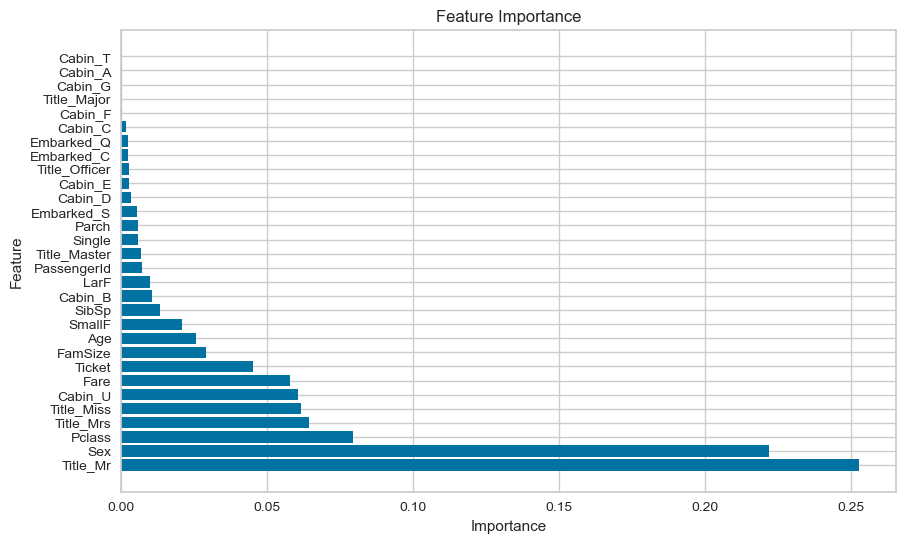

In [27]:
# Create and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [28]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        54
           1       0.81      0.69      0.75        36

    accuracy                           0.81        90
   macro avg       0.81      0.79      0.80        90
weighted avg       0.81      0.81      0.81        90



### 2da iteracion usando features mas importantes > 0.01

Una vez que se calculan las importancias de las características, se puede realizar una evaluación. En este caso, se ha decidido eliminar aquellas características cuya importancia sea menor a 0.01. Esto se hace para reducir el ruido en el modelo y mejorar su eficiencia. Las características con una importancia muy baja pueden no estar contribuyendo significativamente a las predicciones y, por lo tanto, pueden ser eliminadas para simplificar el modelo y mejorar su capacidad de generalización.

#### xgb

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

In [29]:
df_iter = df_encoded.drop(['Title_Mrs', 'Cabin_B', 'LarF', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Title_Major', 'Single', 'Title_Miss', 'SmallF'], axis=1)

In [30]:
df_iter.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,FamSize,...,Embarked_Q,Embarked_S,Cabin_A,Cabin_C,Cabin_D,Cabin_E,Cabin_U,Title_Master,Title_Mr,Title_Officer
0,1,0,3,1,22.0,1,0,523,7.25,2,...,0,1,0,0,0,0,1,0,1,0


In [36]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.10, random_state=100) #rs: 129

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

from sklearn.metrics import classification_report

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        54
           1       0.86      0.69      0.77        36

    accuracy                           0.83        90
   macro avg       0.84      0.81      0.82        90
weighted avg       0.84      0.83      0.83        90



Ya vimos que el rendimiento del modelo no se ve seriamente afectado por haber eliminado las variables, entonces ahora vamos a probar una rapida optimización usando GridSearchCV para ver si podemos mejorar el rendimiento del modelo.

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, classification_report

#param_grid_gbc = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 5, 7, 9], 'learning_rate': [0.1, 0.01, 0.001], 'subsample': [0.8, 1.0]}
param_grid_gbc = {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.1, 0.01], 'subsample': [0.8, 1.0]}

kfold = StratifiedKFold(n_splits=2, random_state=77, shuffle=True)

# Creamos el modelo
gbc = GradientBoostingClassifier(loss= 'log_loss',random_state=0)

# Definimos el objeto 'scorer' para ajustar automáticamente los hiperparámetros de un modelo usando GridSearchCV 
#scorer = make_scorer(accuracy_score)

# Definimos el GridSearchCV para el modelo GradientBoostingClassifier
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, cv=kfold, n_jobs=-1, scoring='f1_macro')

# Ajustamos GridSearchCV a los datos remuestreados
grid_search_gbc.fit(X_train, y_train)

# Obtenemos el mejor estimador para el modelo GradientBoostingClassifier
best_gbc = grid_search_gbc.best_estimator_

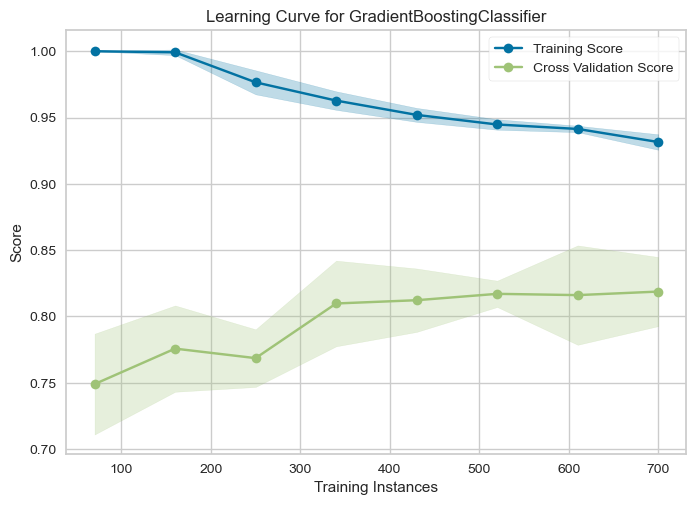

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [38]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from yellowbrick.model_selection import LearningCurve


# Fit the model
best_gbc.fit(X_train, y_train)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=8, random_state=77, shuffle=True)
sizes = np.linspace(0.1, 1.0, 8)

visualizer = LearningCurve(
    best_gbc, cv=cv, scoring=make_scorer(f1_score, average='macro'), train_sizes=sizes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Finalize and render the learning curve
visualizer.show()

In [39]:
# Realizamos las predicciones en el conjunto de prueba
y_pred_gbc = best_gbc.predict(X_test)

# Generamos el informe de clasificación
classification_report_gbc = classification_report(y_test, y_pred_gbc)
print("Gradient Boosting Classifier Classification Report:")
print(classification_report_gbc)

#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
print("Gradient Boosting Classifier Confusion Matrix:")
print(confusion_matrix_gbc)

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        54
           1       0.87      0.72      0.79        36

    accuracy                           0.84        90
   macro avg       0.85      0.82      0.83        90
weighted avg       0.85      0.84      0.84        90

Gradient Boosting Classifier Confusion Matrix:
[[50  4]
 [10 26]]


1. **Precision (Precisión)**: La precisión mide la proporción de predicciones positivas hechas correctamente en relación con todas las predicciones positivas. En este caso, la precisión para la clase "0" es del 83%, lo que significa que el 83% de las predicciones etiquetadas como clase "0" fueron correctas. Para la clase "1", la precisión es del 87%, lo que indica que el 87% de las predicciones etiquetadas como clase "1" fueron correctas.

2. **Recall (Recuperación)**: El recall mide la proporción de verdaderos positivos identificados correctamente en relación con todos los casos reales de la clase. En este caso, el recall para la clase "0" es del 93%, lo que significa que el 93% de los casos reales de la clase "0" se identificaron correctamente. Para la clase "1", el recall es del 72%, lo que indica que el 72% de los casos reales de la clase "1" se identificaron correctamente.

3. **F1-Score (Puntuación F1)**: El puntaje F1 es una métrica que combina la precisión y el recall en un solo número. Es útil cuando se desea equilibrar la importancia de la precisión y el recall. En este caso, el F1-score para la clase "0" es del 88%, y para la clase "1" es del 79%.

4. **Exactitud (Accuracy)**: La exactitud representa la proporción total de predicciones correctas en relación con todas las predicciones. En este caso, la exactitud general del modelo es del 84%, lo que significa que el 84% de todas las predicciones fueron correctas.

5. **Macro Avg (Promedio Macro)**: El promedio macro calcula el promedio no ponderado de las métricas (precisión, recall y F1-score) para todas las clases. En este caso, el promedio macro para todas las clases es del 85%.

6. **Weighted Avg (Promedio Ponderado)**: El promedio ponderado calcula el promedio ponderado de las métricas teniendo en cuenta el número de ejemplos de cada clase. En este caso, el promedio ponderado para todas las clases es del 84%.

7. **Matriz de Confusión**: La matriz de confusión muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. En este caso, la matriz de confusión muestra que hubo 50 verdaderos positivos (casos "0" correctamente identificados) y 26 verdaderos positivos (casos "1" correctamente identificados).

          Feature  Importance
2             Sex    0.317803
1          Pclass    0.125710
18       Title_Mr    0.107132
10     Embarked_Q    0.061527
16        Cabin_U    0.054639
19  Title_Officer    0.042280
15        Cabin_E    0.037069
17   Title_Master    0.034594
4           SibSp    0.033057
8         FamSize    0.032137
14        Cabin_D    0.029487
9      Embarked_C    0.018876
3             Age    0.018645
7            Fare    0.017163
6          Ticket    0.016863
5           Parch    0.015588
0     PassengerId    0.013818
13        Cabin_C    0.011866
11     Embarked_S    0.011744
12        Cabin_A    0.000000


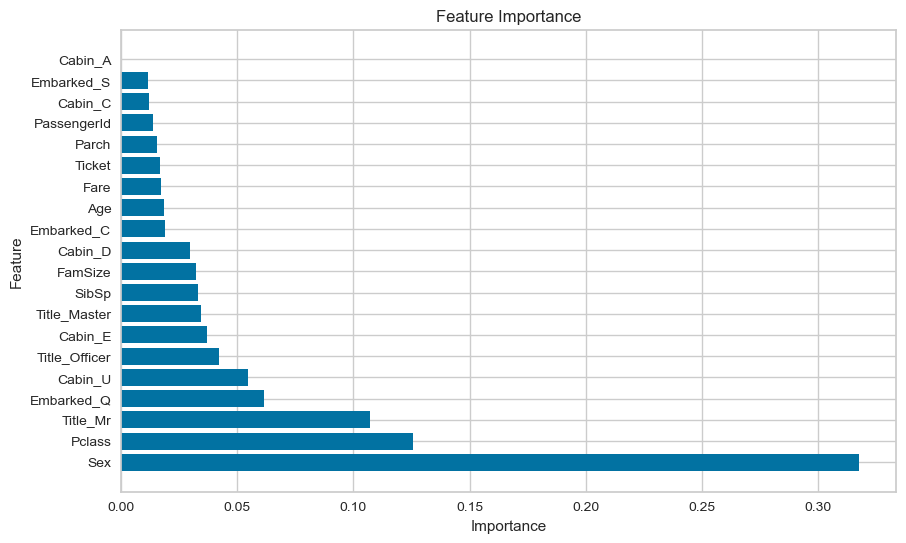

In [41]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

Ahora sacamos el feature immportance del modelo y podemos ver que el modelo no se ve seriamente afectado por haber eliminado las variables y que ahora todas las variables tienen un peso mayor a 0.01 y la grafica se ve mejor en general.

In [42]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

          Feature  Importance
2             Sex    0.283194
18       Title_Mr    0.276724
7            Fare    0.089190
1          Pclass    0.078138
16        Cabin_U    0.065402
6          Ticket    0.060668
8         FamSize    0.044061
3             Age    0.030363
4           SibSp    0.021254
0     PassengerId    0.010664
5           Parch    0.010202
11     Embarked_S    0.008930
9      Embarked_C    0.005076
14        Cabin_D    0.004464
15        Cabin_E    0.004040
17   Title_Master    0.002441
19  Title_Officer    0.001795
10     Embarked_Q    0.001689
13        Cabin_C    0.001485
12        Cabin_A    0.000222


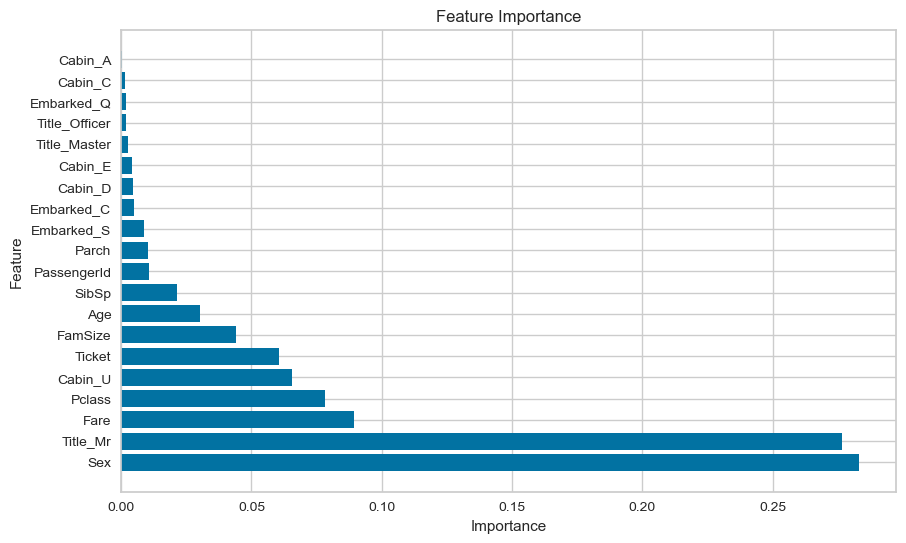

In [43]:
# Create and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [44]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        54
           1       0.80      0.67      0.73        36

    accuracy                           0.80        90
   macro avg       0.80      0.78      0.78        90
weighted avg       0.80      0.80      0.80        90



### rf

25   Title_Master    0.007265
0     PassengerId    0.006889
17        Cabin_C    0.005972
14     Embarked_S    0.005531
5           Parch    0.004644
9          Single    0.004460
19        Cabin_E    0.004407
18        Cabin_D    0.004338
12     Embarked_C    0.004264
16        Cabin_B    0.003335
29  Title_Officer    0.001861
13     Embarked_Q    0.000931
20        Cabin_F    0.000138
21        Cabin_G    0.000131
24    Title_Major    0.000000
22        Cabin_T    0.000000
15        Cabin_A    0.000000

Ahora vamos a voler a repetir el proceso pero esta vez utilizando el modelo de random forest para seleccionar cuales son las variabls con menos importancia en el modelo y eliminarlas en una segunda iteración.

In [45]:
df_iter = df_encoded.drop(['Title_Master', 'PassengerId', 'Cabin_C', 'Embarked_S', 'Embarked_S', 'Parch', 'Single', 'Cabin_E', 'Cabin_D', 'Embarked_C', 'Cabin_B', 'Title_Officer',
'Embarked_Q', 'Cabin_F', 'Cabin_G', 'Title_Major', 'Cabin_T', 'Cabin_A'], axis=1)

In [48]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=100)

In [50]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,       # Maximum depth of each tree
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [51]:
y_pred = xgb_model.predict(X_test)


In [52]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8222222222222222


       Feature  Importance
11    Title_Mr    0.365331
1          Sex    0.295150
0       Pclass    0.127858
9      Cabin_U    0.051136
6      FamSize    0.049914
3        SibSp    0.027159
4       Ticket    0.021460
5         Fare    0.020968
2          Age    0.019328
10  Title_Miss    0.012899
12   Title_Mrs    0.008797
7       SmallF    0.000000
8         LarF    0.000000


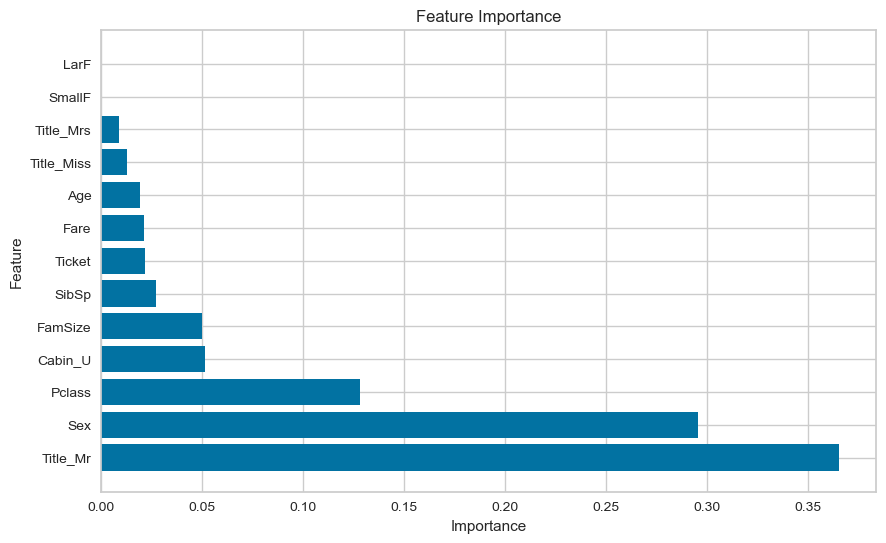

In [53]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

28      Title_Mrs    0.006157
16        Cabin_B    0.000000
11           LarF    0.000000
20        Cabin_F    0.000000
21        Cabin_G    0.000000
22        Cabin_T    0.000000
24    Title_Major    0.000000
9          Single    0.000000
26     Title_Miss    0.000000

In [54]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

       Feature  Importance
1          Sex    0.273740
11    Title_Mr    0.209789
10  Title_Miss    0.087423
0       Pclass    0.077719
5         Fare    0.068516
12   Title_Mrs    0.063188
9      Cabin_U    0.059364
4       Ticket    0.047448
2          Age    0.030523
6      FamSize    0.025868
7       SmallF    0.025452
8         LarF    0.020097
3        SibSp    0.010873


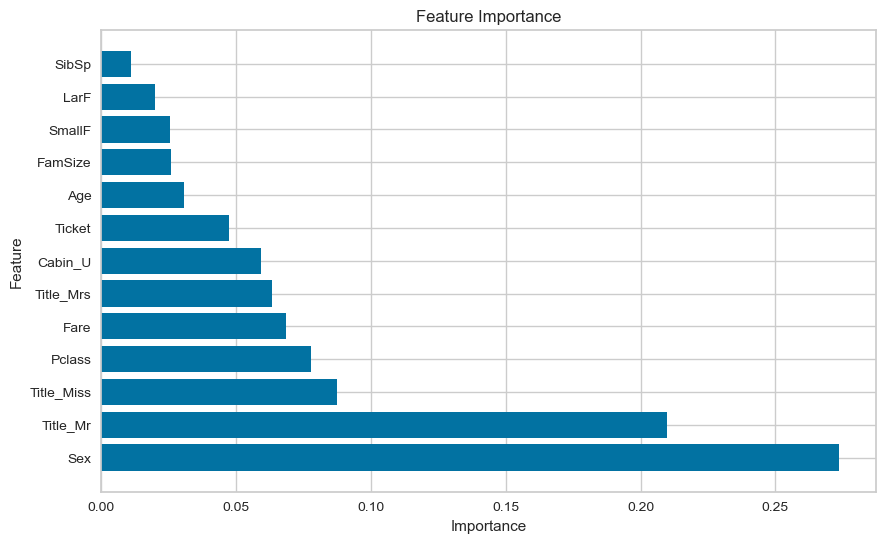

In [55]:
# Create and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the importance scores
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [56]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83        54
           1       0.79      0.64      0.71        36

    accuracy                           0.79        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.79      0.79      0.78        90



Ahora que tenemos ambas selección y eliminación de variables que no importan podmos darnos cuenta de que la que tuvo un mayor rendimiento fue la del modelo de XGB, por lo que vamos a seguir trabajando las variables que nos arrojaba el fature imprtoance de este modelo, quedanodonos con las siguientes vairables.

In [71]:
df_iter = df_encoded.drop(['Title_Mrs', 'Cabin_B', 'LarF', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Title_Major', 'Single', 'Title_Miss', 'SmallF'], axis=1)

### Best model refinamiento

In [72]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import optuna

Este código se encarga de la optimización de hiperparámetros utilizando la biblioteca Optuna para un modelo XGBoost en un problema de clasificación.

Se define una función llamada objective que toma un conjunto de hiperparámetros como entrada y entrena un modelo XGBoost con esos hiperparámetros en el conjunto de entrenamiento. Luego, se evalúa el modelo en el conjunto de validación utilizando la puntuación F1 macro (una métrica de rendimiento para clasificación) y se devuelve esta puntuación como resultado de la función.

Se crea un objeto de estudio de Optuna con el objetivo de maximizar la puntuación F1 macro. Se utiliza la función study.optimize para ejecutar la optimización de la función objetivo definida previamente. Optuna busca iterativamente diferentes conjuntos de hiperparámetros para encontrar aquellos que maximizan la puntuación F1 macro en el conjunto de validación. En este caso, se realizan 100 iteraciones de búsqueda (n_trials=100).

In [73]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=42)

# Define the objective function for Optuna optimization
def objective(trial):
    params = {
        "objective": "multi:softmax",  # Change this based on your problem type
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "num_class": 2,  # Number of classes in the target variable
        "eval_metric": "mlogloss",  # Change this based on your problem type
        "lambda": trial.suggest_float("lambda", 1e-5, 10.0),  # L2 regularization
        "alpha": trial.suggest_float("alpha", 1e-5, 10.0)    # L1 regularization
    }
    
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    return f1

# Create a study object and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print optimization results
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2023-09-13 11:34:39,000] A new study created in memory with name: no-name-4c12b501-3304-45c0-8f99-7ef21f575ad1


[I 2023-09-13 11:34:39,569] Trial 0 finished with value: 0.832535885167464 and parameters: {'n_estimators': 132, 'max_depth': 9, 'learning_rate': 0.07042542879408804, 'subsample': 0.8847173836118873, 'colsample_bytree': 0.9076932784637189, 'lambda': 9.02685452909846, 'alpha': 0.28066155637709095}. Best is trial 0 with value: 0.832535885167464.
[I 2023-09-13 11:34:39,974] Trial 1 finished with value: 0.832535885167464 and parameters: {'n_estimators': 289, 'max_depth': 4, 'learning_rate': 0.2451318726152448, 'subsample': 0.7387315198602962, 'colsample_bytree': 0.9666372949390023, 'lambda': 7.040167450220455, 'alpha': 6.717745588483485}. Best is trial 0 with value: 0.832535885167464.
[I 2023-09-13 11:34:40,380] Trial 2 finished with value: 0.7979130894201558 and parameters: {'n_estimators': 233, 'max_depth': 3, 'learning_rate': 0.012397930743550722, 'subsample': 0.8692916405134345, 'colsample_bytree': 0.7066218283231389, 'lambda': 1.9947857529880448, 'alpha': 5.736467535714421}. Best is t

Number of finished trials:  100
Best trial:
Value:  0.8564593301435407
Params: 
    n_estimators: 115
    max_depth: 8
    learning_rate: 0.27578159128018515
    subsample: 0.9801815190627273
    colsample_bytree: 0.8213763848781064
    lambda: 0.5699397245155773
    alpha: 0.5735790552606983


### Usando los parametros para usar técnicas de regularización

In [80]:
#xgb_model = xgb.XGBClassifier()

#xgb_model.fit(df_iter.drop('Survived', axis=1), df_iter['Survived'])
X_train, X_test, y_train, y_test = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=42)

# Best hyperparameters obtained from Optuna
best_params = {
    "objective": "multi:softmax",  # Change this based on your problem type
    "n_estimators": 128,
    "max_depth": 5,
    "learning_rate": 0.18291622129355922,
    "subsample": 0.6810033786072286,
    "colsample_bytree": 0.9476227876733321,
    "num_class": 2,  # Number of classes in the target variable
    "eval_metric": "mlogloss",
    "lambda": 3.2198226295614223,
    "alpha": 3.2902347692594573 # Change this based on your problem type
}

# Create and train the final XGBoost model
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

print(X_test)

y_pred_kaggle = final_model.predict(X_test)

     PassengerId  Pclass  Sex   Age  SibSp  Parch  Ticket      Fare  FamSize  \
709          710       3    1   4.0      1      1     189   15.2458        3   
439          440       2    1  31.0      0      0     547   10.5000        1   
840          841       3    1  20.0      0      0     647    7.9250        1   
720          721       2    0   6.0      0      1     155   33.0000        2   
39            40       3    0  14.0      1      0     186   11.2417        2   
..           ...     ...  ...   ...    ...    ...     ...       ...      ...   
493          494       1    1  71.0      0      0     603   49.5042        1   
215          216       1    0  31.0      1      0     416  113.2750        2   
309          310       1    0  30.0      0      0     584   56.9292        1   
822          823       1    1  38.0      0      0      97    0.0000        1   
250          251       3    1  26.0      0      0     422    7.2500        1   

     Embarked_C  Embarked_Q  Embarked_S

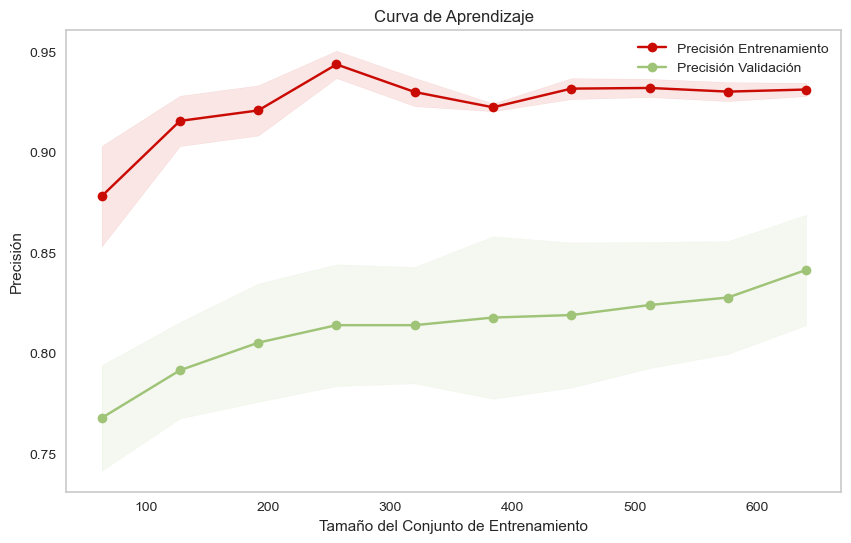

In [81]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    final_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcula las medias y las desviaciones estándar de los puntajes para el conjunto de entrenamiento y el conjunto de validación
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Precisión Entrenamiento"
)
plt.plot(
    train_sizes, val_scores_mean, "o-", color="g", label="Precisión Validación"
)

plt.legend(loc="best")
plt.show()


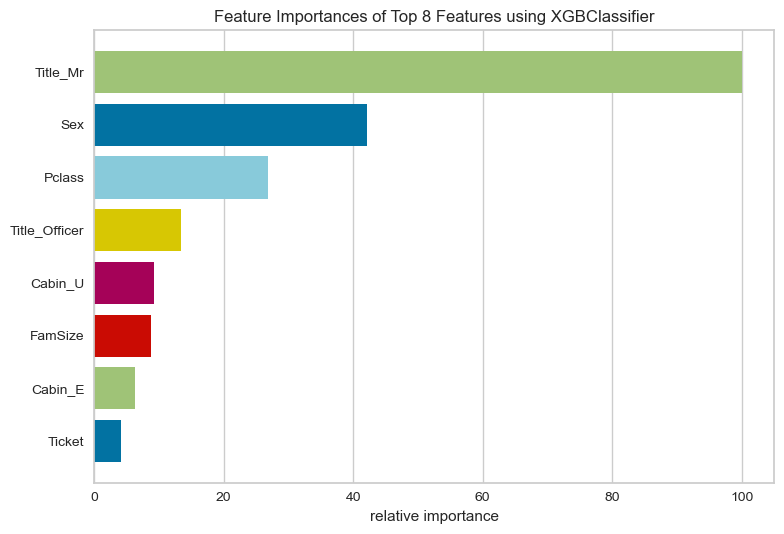

<AxesSubplot:title={'center':'Feature Importances of Top 8 Features using XGBClassifier'}, xlabel='relative importance'>

In [82]:
import yellowbrick
from yellowbrick.model_selection import FeatureImportances
feature_names = X_train.columns

viz = FeatureImportances(final_model, labels=feature_names, topn=8)

viz.fit(X_train, y_train)

viz.show(feature=20)

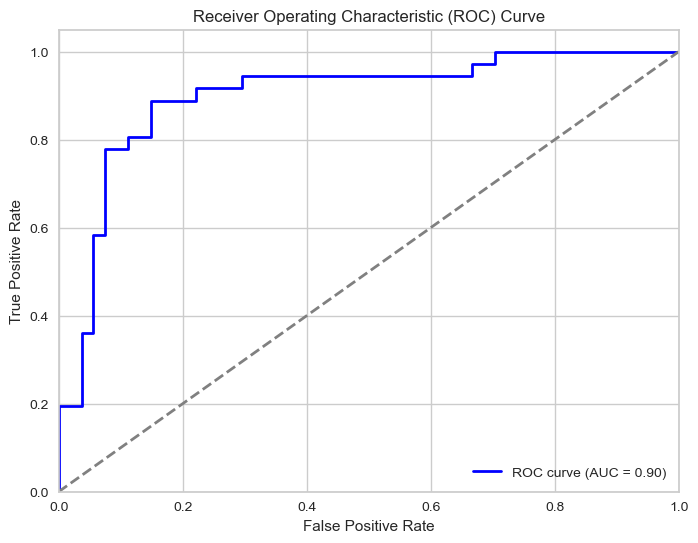

In [65]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = final_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

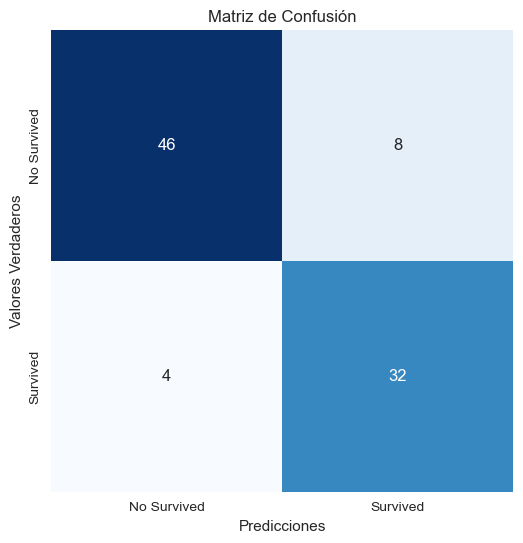

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_kaggle)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['No Survived', 'Survived'], yticklabels=['No Survived', 'Survived'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


In [67]:
confusion

array([[46,  8],
       [ 4, 32]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report

# Make predictions
#y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_test, y_pred_kaggle)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        54
           1       0.80      0.89      0.84        36

    accuracy                           0.87        90
   macro avg       0.86      0.87      0.86        90
weighted avg       0.87      0.87      0.87        90



### Sin usar los parametros para usar técnicas de regularización

In [69]:
# Split the data into training and validation sets
#X_train, X_test, y_train, y_test = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=42)

# Define the objective function for Optuna optimization
def objective(trial):
    params = {
        "objective": "multi:softmax",  # Change this based on your problem type
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "num_class": 2,  # Number of classes in the target variable
        "eval_metric": "mlogloss"#,  # Change this based on your problem type
        #"lambda": trial.suggest_float("lambda", 1e-5, 10.0),  # L2 regularization
        #"alpha": trial.suggest_float("alpha", 1e-5, 10.0)    # L1 regularization
    }
    
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    return f1

# Create a study object and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print optimization results
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2023-09-13 11:31:31,534] A new study created in memory with name: no-name-7af860ca-486c-4529-89fa-f33083fb6c67
[I 2023-09-13 11:31:31,870] Trial 0 finished with value: 0.8164201937786844 and parameters: {'n_estimators': 131, 'max_depth': 6, 'learning_rate': 0.2473088715205131, 'subsample': 0.8290017371395533, 'colsample_bytree': 0.9361611150064535}. Best is trial 0 with value: 0.8164201937786844.
[I 2023-09-13 11:31:32,069] Trial 1 finished with value: 0.8514285714285714 and parameters: {'n_estimators': 93, 'max_depth': 4, 'learning_rate': 0.2560423411787566, 'subsample': 0.9034497123315969, 'colsample_bytree': 0.8940713922848775}. Best is trial 1 with value: 0.8514285714285714.
[I 2023-09-13 11:31:32,560] Trial 2 finished with value: 0.8271668160286776 and parameters: {'n_estimators': 192, 'max_depth': 6, 'learning_rate': 0.051098736146754885, 'subsample': 0.7417067844710801, 'colsample_bytree': 0.9844954747290653}. Best is trial 1 with value: 0.8514285714285714.
[I 2023-09-13 11:3

Number of finished trials:  100
Best trial:
Value:  0.8623151453340132
Params: 
    n_estimators: 111
    max_depth: 3
    learning_rate: 0.2596894673585586
    subsample: 0.9286881328650731
    colsample_bytree: 0.6608660261859794


In [74]:
#xgb_model = xgb.XGBClassifier()

#xgb_model.fit(df_iter.drop('Survived', axis=1), df_iter['Survived'])
X_train, X_val, y_train, y_val = train_test_split(df_iter.drop('Survived', axis = 1), df_iter['Survived'], test_size=0.1, random_state=42)

# Best hyperparameters obtained from Optuna
best_params = {
    "objective": "multi:softmax",  # Change this based on your problem type
    "n_estimators": 111,
    "max_depth": 3,
    "learning_rate": 0.2596894673585586,
    "subsample": 0.9286881328650731,
    "colsample_bytree": 0.6608660261859794,
    "num_class": 2,  # Number of classes in the target variable
    "eval_metric": "mlogloss"#,
    #"lambda": 9.146244200654884,
    #"alpha": 6.356770832676704 # Change this based on your problem type
}

# Create and train the final XGBoost model
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

print(X_val)

y_pred_kaggle = final_model.predict(X_val)

     PassengerId  Pclass  Sex   Age  SibSp  Parch  Ticket      Fare  FamSize  \
709          710       3    1   4.0      1      1     189   15.2458        3   
439          440       2    1  31.0      0      0     547   10.5000        1   
840          841       3    1  20.0      0      0     647    7.9250        1   
720          721       2    0   6.0      0      1     155   33.0000        2   
39            40       3    0  14.0      1      0     186   11.2417        2   
..           ...     ...  ...   ...    ...    ...     ...       ...      ...   
493          494       1    1  71.0      0      0     603   49.5042        1   
215          216       1    0  31.0      1      0     416  113.2750        2   
309          310       1    0  30.0      0      0     584   56.9292        1   
822          823       1    1  38.0      0      0      97    0.0000        1   
250          251       3    1  26.0      0      0     422    7.2500        1   

     Embarked_C  Embarked_Q  Embarked_S

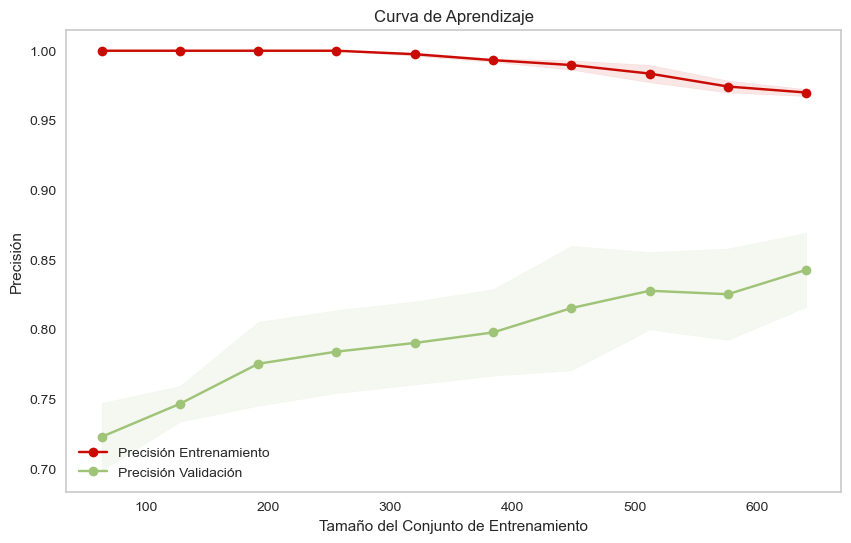

In [75]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    final_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcula las medias y las desviaciones estándar de los puntajes para el conjunto de entrenamiento y el conjunto de validación
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Precisión Entrenamiento"
)
plt.plot(
    train_sizes, val_scores_mean, "o-", color="g", label="Precisión Validación"
)

plt.legend(loc="best")
plt.show()


In [77]:
from sklearn.metrics import classification_report

# Make predictions
#y_pred = rf_model.predict(X_test)

# Generate classification report
class_names = np.unique(df_encoded['Survived'])  # Assuming your classes are labeled as '0', '1', ...
report = classification_report(y_val, y_pred_kaggle)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.82      0.86      0.84        36

    accuracy                           0.87        90
   macro avg       0.86      0.87      0.86        90
weighted avg       0.87      0.87      0.87        90



### Esto nos sirve para subir la rpedicción a kaggle ***IGNORAR***

In [530]:
# Convert the NumPy array to a pandas DataFrame
kg = pd.DataFrame(y_pred_kaggle)

# Save the DataFrame to a CSV file
csv_filename = "submission.csv"
kg.to_csv(csv_filename, index=False)

In [533]:
kaggle_test = pd.read_csv(r"..\Limpieza_de_datos\test.csv")

In [534]:
kaggle_test.shape

(418, 11)

In [535]:
kaggle_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [536]:
kaggle_test['FamSize'] = kaggle_test['SibSp'] + kaggle_test['Parch'] + 1

#we create features based on the family size
kaggle_test['Single'] = kaggle_test['FamSize'].map(lambda s: 1 if s == 1 else 0)
kaggle_test['SmallF'] = kaggle_test['FamSize'].map(lambda s: 1 if  2 <= s <= 4  else 0)
kaggle_test['LarF'] = kaggle_test['FamSize'].map(lambda s: 1 if 5 <= s else 0)

kaggle_test.Embarked.fillna('S', inplace=True)


In [537]:

df_dummies = pd.get_dummies(kaggle_test.Embarked, prefix='Embarked')
kaggle_test = pd.concat([kaggle_test, df_dummies], axis=1)

kaggle_test.drop('Embarked', axis=1, inplace=True)

In [538]:
kaggle_test.Cabin.fillna('U', inplace=True)

kaggle_test['Cabin'] = kaggle_test['Cabin'].map(lambda c: c[0])

#dummy
cabin_dummies = pd.get_dummies(kaggle_test['Cabin'], prefix='Cabin')
kaggle_test = pd.concat([kaggle_test, cabin_dummies], axis=1)

kaggle_test.drop('Cabin', axis=1, inplace=True)

In [539]:
titles = set()
for name in kaggle_test['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [540]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major":"Major",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle":"Miss",
    "Ms":"Mrs",
    "Mr":"Mr",
    "Mrs":"Mrs",
    "Miss":"Miss",
    "Master":"Master",
    "Lady":"Royalty"
}

kaggle_test['Title'] = kaggle_test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

kaggle_test['Title'] = kaggle_test.Title.map(Title_Dictionary)


dfwoname = kaggle_test.drop(['Name', 'Ticket'], axis=1)


In [541]:
dfwoname.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,Single,SmallF,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Title
0,892,3,male,34.5,0,0,7.8292,1,1,0,...,False,False,False,False,False,False,False,False,True,Mr
1,893,3,female,47.0,1,0,7.0000,2,0,1,...,True,False,False,False,False,False,False,False,True,Mrs
2,894,2,male,62.0,0,0,9.6875,1,1,0,...,False,False,False,False,False,False,False,False,True,Mr
3,895,3,male,27.0,0,0,8.6625,1,1,0,...,True,False,False,False,False,False,False,False,True,Mr
4,896,3,female,22.0,1,1,12.2875,3,0,1,...,True,False,False,False,False,False,False,False,True,Mrs


In [542]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()

In [543]:
grouped_train = dfwoname.groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [544]:
def fill_age(row):    
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        (grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    if np.isnan(grouped_median_train[condition]['Age'].values[0]):
        print('true')
        condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        #(grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )

    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global kaggle_test
    kaggle_test['Age'] = kaggle_test.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return kaggle_test

In [545]:
kaggle_test = process_age()

In [546]:
kaggle_test = kaggle_test.drop(['Name'], axis=1)

kaggle_test = pd.get_dummies(kaggle_test, columns=["Title"], prefix=["Title"])

#kaggle_test = kaggle_test.drop(['Title_Royalty'], axis=1)


from sklearn.preprocessing import LabelEncoder
# Use LabelEncoder for "categorical_col"
label_encoder = LabelEncoder()
kaggle_test["Ticket"] = label_encoder.fit_transform(kaggle_test["Ticket"])
kaggle_test["Sex"] = label_encoder.fit_transform(kaggle_test["Sex"])



In [547]:
kaggle_test = kaggle_test.drop(['PassengerId', 'Cabin_C', 'Embarked_S', 'Embarked_S', 'Parch', 'Single', 'Cabin_E', 'Cabin_D', 'Embarked_C', 'Cabin_B', 'Embarked_Q', 'Cabin_F', 'Cabin_G', 'Cabin_A'], axis=1)

In [548]:
kaggle_test['Title_Major'] = False

In [549]:
kaggle_test = kaggle_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare',
        'FamSize', 'SmallF', 'LarF', 'Cabin_U', 'Title_Major', 'Title_Master',
        'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer']]

In [550]:
kaggle_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare', 'FamSize', 'SmallF',
       'LarF', 'Cabin_U', 'Title_Major', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer'],
      dtype='object')

In [551]:
df_iter.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Ticket', 'Fare',
       'FamSize', 'SmallF', 'LarF', 'Cabin_U', 'Title_Miss', 'Title_Mr',
       'Title_Mrs'],
      dtype='object')

In [553]:
final_model.save_model('xgb_model.bin')